In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
df = pd.read_csv('750raw.csv')

In [ ]:
df.head()

,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,admissionweight,unitdischargestatus,admissionheight.1,albumin,...,sodium.1,temperature,meanbp,aids,hepaticfailure,leukemia,lymphoma,metastaticcancer,immunosuppression,cirrhosis
0,141765,Female,87,Caucasian,"Rhythm disturbance (atrial, supraventricular)",157.50,46.50,Alive,157.50,NaN,...,139.00,36.20,108,0,0,0,0,0,0,0
1,143870,Male,76,Caucasian,"Endarterectomy, carotid",167.00,77.50,Alive,167.00,NaN,...,133.00,36.40,47,0,0,0,0,0,0,0
2,144815,Female,34,Caucasian,"Overdose, other toxin, poison or drug",172.70,60.30,Alive,172.70,3.60,...,141.00,36.70,61,0,0,0,0,0,0,0
3,145427,Male,61,Caucasian,"GI perforation/rupture, surgery for",177.80,91.70,Alive,177.80,NaN,...,141.00,36.20,72,0,0,0,0,0,0,0
4,147784,Female,60,Hispanic,Coma/change in level of consciousness (for hep...,154.90,95.60,Alive,154.90,2.80,...,142.00,36.00,130,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum()

patientunitstayid         0
gender                    1
age                       0
ethnicity                20
apacheadmissiondx        31
admissionheight          28
admissionweight          44
unitdischargestatus       0
admissionheight.1        28
albumin                1193
BUN                      10
bicarbonate               0
creatinine                9
FiO2                   1813
glucose                  26
HCO3                   1808
Hct                     423
paO2                   1805
pH                     1803
potassium                 0
Respiratory            1824
sodium                    0
Temperature            1820
bilirubin              1286
WBC_1000                440
fiO2_paO2              1815
intubated                 0
vent                      0
dialysis                  0
eyes                      0
motor                     0
verbal                    0
urine                     0
heartrate                 0
wbc                       0
albumin.1           

We can see that all patients does not have aids, so we probably want to drop this column. 

In [ ]:
df['unitdischargestatus'].value_counts()

Alive      1738
Expired      86
Name: unitdischargestatus, dtype: int64

We can see these two variables are the same, so we want to drop one one them. 

In [ ]:
df = df.drop(['aids','albumin','urine','bilirubin.1','FiO2','HCO3','paO2','pH','Respiratory','Temperature','bilirubin','fiO2_paO2',"admissionheight.1", "WBC_1000", "BUN", "glucose.1", 'creatinine.1', 'sodium.1','Hct'], axis=1)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1823
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patientunitstayid    1697 non-null   int64  
 1   gender               1697 non-null   object 
 2   age                  1697 non-null   object 
 3   ethnicity            1697 non-null   object 
 4   apacheadmissiondx    1697 non-null   object 
 5   admissionheight      1697 non-null   float64
 6   admissionweight      1697 non-null   float64
 7   unitdischargestatus  1697 non-null   object 
 8   bicarbonate          1697 non-null   float64
 9   creatinine           1697 non-null   float64
 10  glucose              1697 non-null   float64
 11  potassium            1697 non-null   float64
 12  sodium               1697 non-null   float64
 13  intubated            1697 non-null   int64  
 14  vent                 1697 non-null   int64  
 15  dialysis             1697 non-null   i

In [ ]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1697 entries, 0 to 1823
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patientunitstayid    1697 non-null   int64  
 1   gender               1697 non-null   object 
 2   age                  1697 non-null   object 
 3   ethnicity            1697 non-null   object 
 4   apacheadmissiondx    1697 non-null   object 
 5   admissionheight      1697 non-null   float64
 6   admissionweight      1697 non-null   float64
 7   unitdischargestatus  1697 non-null   object 
 8   bicarbonate          1697 non-null   float64
 9   creatinine           1697 non-null   float64
 10  glucose              1697 non-null   float64
 11  potassium            1697 non-null   float64
 12  sodium               1697 non-null   float64
 13  intubated            1697 non-null   int64  
 14  vent                 1697 non-null   int64  
 15  dialysis             1697 non-null   i

In [ ]:
unitdischargestatus = df['unitdischargestatus']
#store it for future use
df = df.drop(columns=['unitdischargestatus'])

Here we want to recode three object variable.

In [ ]:
df['age'] = df['age'].replace('> 89',89)
df = df.astype({'age':'int'})

In [ ]:
ethnicity_num = [0,1,2,3,4,5]
ethnicity_char = ["Caucasian", "Hispanic", "African American", "Other/Unknown", "Asian", "Native American"]

df['ethnicity'] = df['ethnicity'].replace(ethnicity_char, ethnicity_num)

In [ ]:
gender_num = [0,1]
gender_char = ["Female", "Male"]

df['gender'] = df['gender'].replace(gender_char, gender_num)

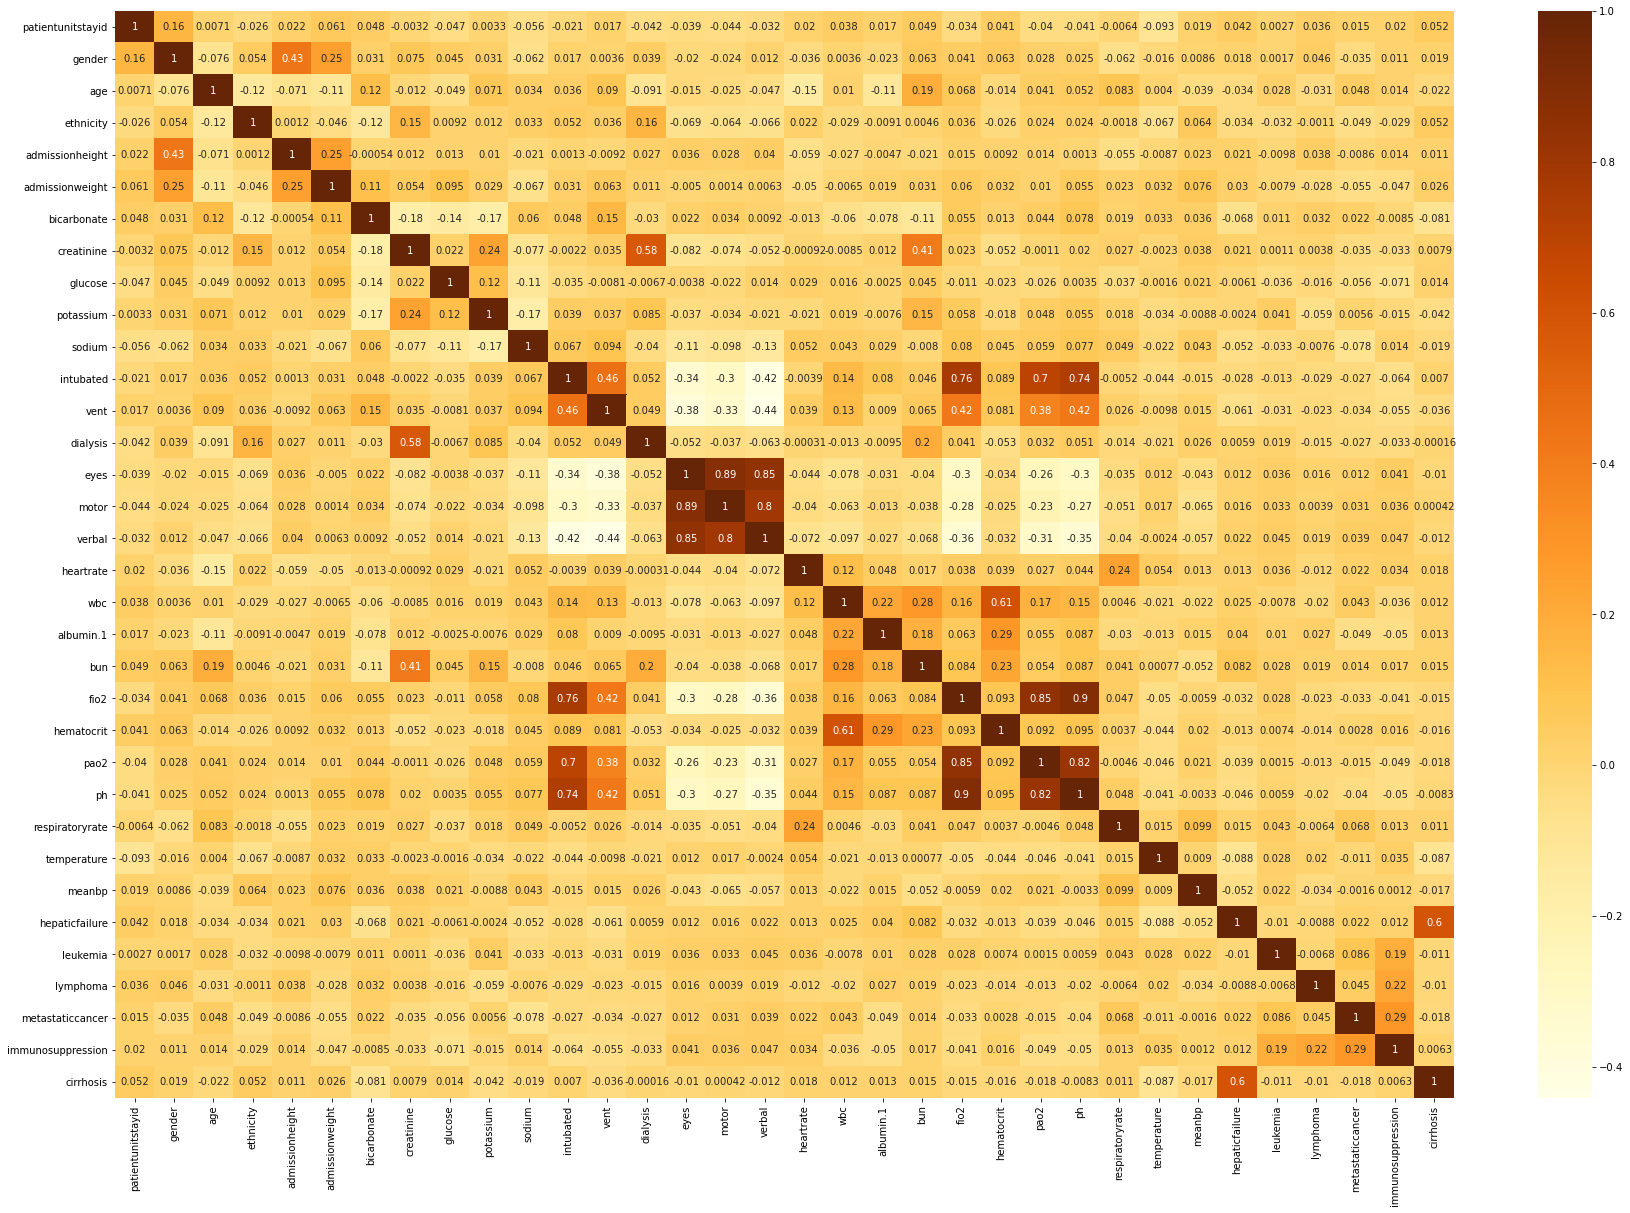

In [ ]:
col = list(df.columns)
corr = df[col].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='YlOrBr');

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

Now we need to create our own variables for scoring:

In [ ]:
df['fio2/pao2'] = df['fio2']/df['pao2']*100
df = df.astype({'fio2/pao2':'int'})

In [ ]:
#bmi = weight(kg)/(height(m)*height(m))
df['bmi'] = round(df['admissionweight']/(df['admissionheight']**2 /10000),2)
df = df.astype({'bmi':'float'})

In [ ]:
df ['GCS'] = df['eyes']+df['motor']+df['verbal']

In [ ]:
df.head(30)

,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,admissionweight,bicarbonate,creatinine,glucose,...,meanbp,hepaticfailure,leukemia,lymphoma,metastaticcancer,immunosuppression,cirrhosis,fio2/pao2,bmi,GCS
0,141765,0,87,0,"Rhythm disturbance (atrial, supraventricular)",157.50,46.50,26.00,0.85,79.00,...,108,0,0,0,0,0,0,100,18.75,15
1,143870,1,76,0,"Endarterectomy, carotid",167.00,77.50,22.00,1.14,140.00,...,47,0,0,0,0,0,0,100,27.79,15
2,144815,0,34,0,"Overdose, other toxin, poison or drug",172.70,60.30,26.00,0.63,82.00,...,61,0,0,0,0,0,0,100,20.22,15
3,145427,1,61,0,"GI perforation/rupture, surgery for",177.80,91.70,27.00,1.05,139.00,...,72,0,0,0,0,0,0,100,29.01,15
4,147784,0,60,1,Coma/change in level of consciousness (for hep...,154.90,95.60,36.00,0.54,136.00,...,130,0,0,0,0,0,0,78,39.84,13
5,148611,1,28,0,"Overdose, other toxin, poison or drug",182.90,91.80,30.00,0.82,112.00,...,108,0,0,0,0,0,0,100,27.44,15
6,149713,0,89,0,"Infarction, acute myocardial (MI)",157.50,58.50,22.00,0.61,97.00,...,65,0,0,0,0,0,0,100,23.58,14
9,151900,0,66,0,"Sepsis, pulmonary",165.10,86.80,28.00,0.96,107.00,...,174,0,0,0,0,1,0,33,31.84,11
10,152954,0,41,0,"Respiratory - medical, other",170.20,81.00,26.00,0.80,102.00,...,117,0,0,0,0,0,0,100,27.96,15
12,155961,0,57,0,"Knee replacement, total (non-traumatic)",157.50,120.10,28.00,0.80,117.00,...,54,0,0,0,0,0,0,100,48.42,15


In [ ]:
import re
df.type_of_admission = ''
df.apacheadmissiondx = df.apacheadmissiondx.str.lower()
df = df.replace({'apacheadmissiondx':'non-traumatic|(non-traumatic)'}, {'apacheadmissiondx': ''}, regex=True)
df.head()

,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,admissionweight,bicarbonate,creatinine,glucose,...,meanbp,hepaticfailure,leukemia,lymphoma,metastaticcancer,immunosuppression,cirrhosis,fio2/pao2,bmi,GCS
0,141765,0,87,0,"rhythm disturbance (atrial, supraventricular)",157.50,46.50,26.00,0.85,79.00,...,108,0,0,0,0,0,0,100,18.75,15
1,143870,1,76,0,"endarterectomy, carotid",167.00,77.50,22.00,1.14,140.00,...,47,0,0,0,0,0,0,100,27.79,15
2,144815,0,34,0,"overdose, other toxin, poison or drug",172.70,60.30,26.00,0.63,82.00,...,61,0,0,0,0,0,0,100,20.22,15
3,145427,1,61,0,"gi perforation/rupture, surgery for",177.80,91.70,27.00,1.05,139.00,...,72,0,0,0,0,0,0,100,29.01,15
4,147784,0,60,1,coma/change in level of consciousness (for hep...,154.90,95.60,36.00,0.54,136.00,...,130,0,0,0,0,0,0,78,39.84,13


In [ ]:
list_of_ad = ["surgery", "CABG", "placement", "tomy", "graft","Herniorrhaphy","replacement", "repair", "transplant", "insertion", "resection", "procedure", "Fusion-spinal/Harrington rods", "Cesarean section"]
pattern = '|'.join(list_of_ad)
print(pattern)
df.loc[df['apacheadmissiondx'].str.contains(pattern),"type_of_admission"] = 'scheduled'

df.loc[df['apacheadmissiondx'].str.contains("trauma|Trauma"),"type_of_admission"] = 'unscheduled'
df[df['apacheadmissiondx'].str.contains("trauma|Trauma")]

df.type_of_admission.fillna('Other', inplace=True)


surgery|CABG|placement|tomy|graft|Herniorrhaphy|replacement|repair|transplant|insertion|resection|procedure|Fusion-spinal/Harrington rods|Cesarean section


In [ ]:
#df['type_of_admission'].head(30)
df

,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,admissionweight,bicarbonate,creatinine,glucose,...,hepaticfailure,leukemia,lymphoma,metastaticcancer,immunosuppression,cirrhosis,fio2/pao2,bmi,GCS,type_of_admission
0,141765,0,87,0,"rhythm disturbance (atrial, supraventricular)",157.50,46.50,26.00,0.85,79.00,...,0,0,0,0,0,0,100,18.75,15,Other
1,143870,1,76,0,"endarterectomy, carotid",167.00,77.50,22.00,1.14,140.00,...,0,0,0,0,0,0,100,27.79,15,scheduled
2,144815,0,34,0,"overdose, other toxin, poison or drug",172.70,60.30,26.00,0.63,82.00,...,0,0,0,0,0,0,100,20.22,15,Other
3,145427,1,61,0,"gi perforation/rupture, surgery for",177.80,91.70,27.00,1.05,139.00,...,0,0,0,0,0,0,100,29.01,15,scheduled
4,147784,0,60,1,coma/change in level of consciousness (for hep...,154.90,95.60,36.00,0.54,136.00,...,0,0,0,0,0,0,78,39.84,13,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,3351763,0,62,0,"fistula/abscess, surgery for (not inflammatory...",165.10,134.50,27.00,0.66,117.00,...,0,0,0,0,0,0,57,49.34,10,scheduled
1820,3352230,1,41,2,"cabg alone, coronary artery bypass grafting",177.80,127.00,26.00,1.46,118.00,...,0,0,0,0,0,0,56,40.17,14,scheduled
1821,3352231,1,41,2,"infarction, acute myocardial (mi)",177.80,127.00,25.00,1.18,117.00,...,0,0,0,0,0,0,33,40.17,15,Other
1822,3352333,1,72,0,gi obstruction,177.80,68.30,30.00,0.74,122.00,...,0,0,0,0,0,0,67,21.61,14,Other


Now we need to compute the saps score

In [ ]:
df['saps_score'] = 0

In [ ]:
df.loc[df.age <40 , "saps_score"] += 0
df.loc[(df['age'] >= 40) & (df['age'] <= 59),"saps_score"] += 7
df.loc[(df['age'] >= 60) & (df['age'] <= 69),"saps_score"] += 12
df.loc[(df['age'] >= 70) & (df['age'] <= 74),"saps_score"] += 15
df.loc[(df['age'] >= 75) & (df['age'] <= 79),"saps_score"] += 16
df.loc[df.age>= 80,"saps_score"] += 12

In [ ]:
df.loc[(df['fio2/pao2'] <100) & (df['vent'] ==1) , "saps_score"] += 11
df.loc[(df['fio2/pao2'] >= 100) & (df['fio2/pao2'] <= 199) & (df['vent'] ==1),"saps_score"] += 9
df.loc[(df['fio2/pao2']>= 200) & (df['vent'] ==1),"saps_score"] += 6
df.loc[df['vent'] ==0 ,"saps_score"] += 0

In [ ]:
df.loc[(df['GCS'] >= 14) & (df['GCS'] <= 15),"saps_score"] += 0
df.loc[(df['GCS'] >= 11) & (df['GCS'] <= 13),"saps_score"] += 5
df.loc[(df['GCS'] >= 9) & (df['GCS'] <= 10),"saps_score"] += 7
df.loc[(df['GCS'] >= 6) & (df['GCS'] <= 8),"saps_score"] += 13
df.loc[df.GCS<6,"saps_score"] += 26

In [ ]:
df.loc[df['temperature'] < 39,"saps_score"] += 0
df.loc[df['temperature'] >= 39,"saps_score"] += 3

In [ ]:
df.loc[df.meanbp <90 , "saps_score"] += 13
df.loc[(df['meanbp'] >= 90) & (df['meanbp'] <= 92),"saps_score"] += 5
df.loc[(df['meanbp'] >= 93) & (df['meanbp'] <= 96),"saps_score"] += 0
df.loc[df.meanbp> 96,"saps_score"] += 2

In [ ]:
#df.loc[(df['urine'] < 500),"saps_score"] += 11
#df.loc[(df['urine'] >= 500) & (df['urine'] <= 999),"saps_score"] += 4
#df.loc[(df['urine'] >= 1000),"saps_score"] += 0

In [ ]:
df.loc[(df['potassium'] < 3),"saps_score"] += 3
df.loc[(df['potassium'] >= 3.0) & (df['potassium'] <= 4.9),"saps_score"] += 0
df.loc[(df['potassium'] >= 5.0),"saps_score"] += 3

In [ ]:
df.loc[(df['bun'] < 28) ,"saps_score"] += 0
df.loc[((df['bun'] >=28) & (df['bun'] <= 83)) <= 29.6,"saps_score"] += 6
df.loc[(df['bun'] >= 84) ,"saps_score"] += 10

In [ ]:
df.loc[df["sodium"]<125 , "saps_score"] += 5
df.loc[(df['sodium'] >= 125) & (df['sodium'] <= 144),"saps_score"] += 0
df.loc[df["sodium"] > 144,"saps_score"] += 1

In [ ]:
df.loc[df["bicarbonate"]<15 , "bicarbonate"] += 6
df.loc[(df['bicarbonate'] >= 15) & (df['bicarbonate'] <= 19),"saps_score"] += 3
df.loc[df["bicarbonate"] > 19,"saps_score"] += 0

In [ ]:
#df.loc[(df['bilirubin.1'] < 4.0),"saps_score"] += 0
#df.loc[(df['bilirubin.1'] >= 4.0) & (df['bilirubin.1'] <= 5.9),"saps_score"] += 4
#df.loc[(df['bilirubin.1'] >= 6.0),"saps_score"] += 9

In [ ]:
df.loc[(df['wbc'] >= 1.0) & (df['wbc']  <= 19.9),"saps_score"] += 0
df.loc[(df['wbc'] >= 20.0),"saps_score"] += 3
df.loc[(df['wbc'] < 1.0),"saps_score"] += 12

In [ ]:
df.loc[df.heartrate <40 , "saps_score"] += 11
df.loc[(df['heartrate'] >= 40) & (df['heartrate'] <= 69),"saps_score"] += 2
df.loc[(df['heartrate'] >= 70) & (df['heartrate'] <= 119),"saps_score"] += 0
df.loc[(df['heartrate'] >= 120) & (df['heartrate'] <= 159),"saps_score"] += 4
df.loc[df.heartrate>= 160,"saps_score"] += 7

In [ ]:
df.loc[df["metastaticcancer"] == 1 , "saps_score"] += 9
df.loc[df["leukemia"] == 1, "saps_score"] += 10

In [ ]:
df.loc[df["type_of_admission"] == 'Other' , "saps_score"] += 6
df.loc[df["type_of_admission"] == 'scheduled', "saps_score"] += 0
df.loc[df["type_of_admission"] == 'unscheduled' , "saps_score"] += 8

In [ ]:
df.head(30)

,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,admissionweight,bicarbonate,creatinine,glucose,...,leukemia,lymphoma,metastaticcancer,immunosuppression,cirrhosis,fio2/pao2,bmi,GCS,type_of_admission,saps_score
0,141765,0,87,0,"rhythm disturbance (atrial, supraventricular)",157.50,46.50,26.00,0.85,79.00,...,0,0,0,0,0,100,18.75,15,Other,26
1,143870,1,76,0,"endarterectomy, carotid",167.00,77.50,22.00,1.14,140.00,...,0,0,0,0,0,100,27.79,15,scheduled,37
2,144815,0,34,0,"overdose, other toxin, poison or drug",172.70,60.30,26.00,0.63,82.00,...,0,0,0,0,0,100,20.22,15,Other,29
3,145427,1,61,0,"gi perforation/rupture, surgery for",177.80,91.70,27.00,1.05,139.00,...,0,0,0,0,0,100,29.01,15,scheduled,36
4,147784,0,60,1,coma/change in level of consciousness (for hep...,154.90,95.60,36.00,0.54,136.00,...,0,0,0,0,0,78,39.84,13,Other,31
5,148611,1,28,0,"overdose, other toxin, poison or drug",182.90,91.80,30.00,0.82,112.00,...,0,0,0,0,0,100,27.44,15,Other,14
6,149713,0,89,0,"infarction, acute myocardial (mi)",157.50,58.50,22.00,0.61,97.00,...,0,0,0,0,0,100,23.58,14,Other,37
9,151900,0,66,0,"sepsis, pulmonary",165.10,86.80,28.00,0.96,107.00,...,0,0,0,1,0,33,31.84,11,Other,35
10,152954,0,41,0,"respiratory - medical, other",170.20,81.00,26.00,0.80,102.00,...,0,0,0,0,0,100,27.96,15,Other,21
12,155961,0,57,0,"knee replacement, total ()",157.50,120.10,28.00,0.80,117.00,...,0,0,0,0,0,100,48.42,15,scheduled,35


In [ ]:
unitdischargestatus.value_counts()

Alive      1616
Expired      81
Name: unitdischargestatus, dtype: int64

In [ ]:
outcome_num = [0,1]
outcome_char = ["Expired", "Alive"]

unitdischargestatus = unitdischargestatus.replace(outcome_char, outcome_num)
unitdischargestatus.value_counts()

1    1616
0      81
Name: unitdischargestatus, dtype: int64

In [ ]:
unitdischargestatus

0       1
1       1
2       1
3       1
4       1
       ..
1819    1
1820    1
1821    1
1822    1
1823    1
Name: unitdischargestatus, Length: 1697, dtype: int64

In [ ]:
df = df.join(unitdischargestatus)
df.head()

,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,admissionheight,admissionweight,bicarbonate,creatinine,glucose,...,lymphoma,metastaticcancer,immunosuppression,cirrhosis,fio2/pao2,bmi,GCS,type_of_admission,saps_score,unitdischargestatus
0,141765,0,87,0,"rhythm disturbance (atrial, supraventricular)",157.50,46.50,26.00,0.85,79.00,...,0,0,0,0,100,18.75,15,Other,26,1
1,143870,1,76,0,"endarterectomy, carotid",167.00,77.50,22.00,1.14,140.00,...,0,0,0,0,100,27.79,15,scheduled,37,1
2,144815,0,34,0,"overdose, other toxin, poison or drug",172.70,60.30,26.00,0.63,82.00,...,0,0,0,0,100,20.22,15,Other,29,1
3,145427,1,61,0,"gi perforation/rupture, surgery for",177.80,91.70,27.00,1.05,139.00,...,0,0,0,0,100,29.01,15,scheduled,36,1
4,147784,0,60,1,coma/change in level of consciousness (for hep...,154.90,95.60,36.00,0.54,136.00,...,0,0,0,0,78,39.84,13,Other,31,1


In [ ]:
df.to_csv('unique750.csv', index=False) 